In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 创建模拟的房屋数据（更真实一些）

np.random.seed(42)
num_houses = 200

# 生成特征数据
area = np.random.randint(50, 200, num_houses)  # 面积：50-200平方米
bedrooms = np.random.randint(1, 5, num_houses)  # 卧室：1-4间
bathrooms = np.random.randint(1, 4, num_houses) # 卫生间：1-3间
age = np.random.randint(0, 30, num_houses)      # 房龄：0-30年

# 生成房价（基于真实关系 + 一些噪声）
# 假设：每平米2万，每间卧室15万，每间卫生间10万，每年折旧1万
base_price = 20000 * area + 150000 * bedrooms + 100000 * bathrooms - 10000 * age
noise = np.random.normal(0, 50000, num_houses)  # 添加一些随机噪声
price = base_price + noise

# 创建DataFrame
df = pd.DataFrame({
    '面积_平方米': area,
    '卧室数': bedrooms,
    '卫生间数': bathrooms,
    '房龄_年': age,
    '价格_万元': price / 10000  # 转换为万元
})



print("房屋数据预览：")
print(df.head(10).to_string())
print(f"\n总共{len(df)}条房屋数据")

房屋数据预览：
   面积_平方米  卧室数  卫生间数  房龄_年   价格_万元
0           70       1         3        8  179.461474
1          154       2         2       24  333.453013
2          131       4         3       11  332.310190
3          127       1         3       25  280.736327
4          104       2         2       23  235.973429
5          109       1         3        0  268.540829
6          171       4         3       17  407.153189
7          129       3         1        5  314.317255
8          119       3         3        2  307.716614
9           66       2         1       18  153.611033

总共200条房屋数据


=== 数据统计摘要 ===
       面积_平方米      卧室数    卫生间数     房龄_年   价格_万元
count   200.000000  200.000000  200.000000  200.000000  200.000000
mean    121.655000    2.565000    2.015000   14.565000  287.272955
std      42.956984    1.145573    0.817383    9.001718   88.901209
min      50.000000    1.000000    1.000000    0.000000  125.477294
25%      82.000000    2.000000    1.000000    7.000000  212.471773
50%     121.000000    2.000000    2.000000   14.000000  287.206071
75%     159.000000    4.000000    3.000000   22.250000  365.127340
max     199.000000    4.000000    3.000000   29.000000  466.840565


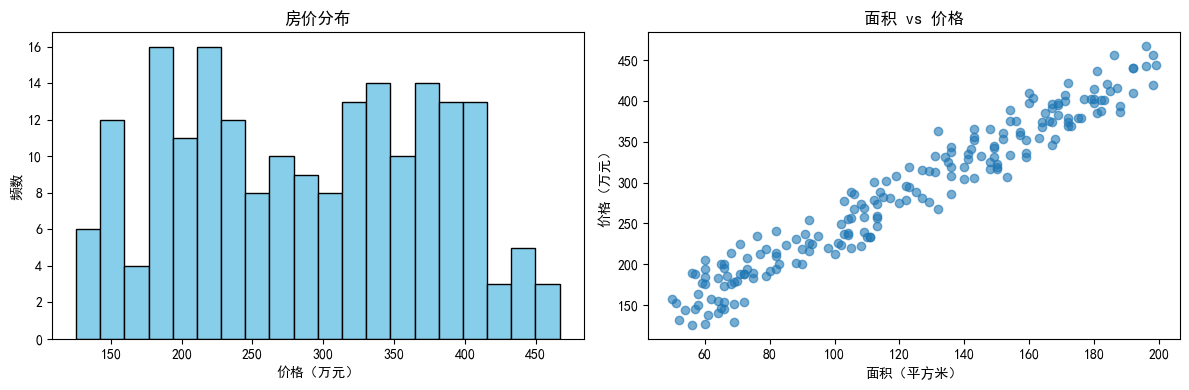

In [4]:
# 单元格2：数据探索和可视化
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun']  # 常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

print("=== 数据统计摘要 ===")

print(df.describe())

# 绘制价格分布
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['价格_万元'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('价格（万元）')
plt.ylabel('频数')
plt.title('房价分布')

# 面积与价格的关系
plt.subplot(1, 2, 2)
plt.scatter(df['面积_平方米'], df['价格_万元'], alpha=0.6)
plt.xlabel('面积（平方米）')
plt.ylabel('价格（万元）')
plt.title('面积 vs 价格')
plt.tight_layout()
plt.show()

In [8]:
# 单元格3：准备数据并训练模型
# 准备特征和目标变量
X = df[['面积_平方米', '卧室数', '卫生间数', '房龄_年']]  # 多个特征
y = df['价格_万元']

print("特征数据形状:", X.shape)
print("目标数据形状:", y.shape)


# 创建和训练多元线性回归模型
model = LinearRegression()
model.fit(X, y)

print("\n模型训练完成！")
print(f"系数 (权重): {model.coef_}")
print(f"截距: {model.intercept_:.2f}")


特征数据形状: (200, 4)
目标数据形状: (200,)

模型训练完成！
系数 (权重): [ 1.99885309 14.80037177 10.26989188 -0.91956898]
截距: -1.16


In [9]:
# 单元格4：解释模型系数
feature_names = ['面积', '卧室', '卫生间', '房龄']
print("=== 模型系数解释 ===")
print("每个特征对房价的影响：")
for i, (name, coef) in enumerate(zip(feature_names, model.coef_)):
    effect = "增加" if coef > 0 else "减少"
    print(f"{name}: 每{effect}1单位，房价{effect}{abs(coef):.2f}万元")

print(f"\n基础价格（所有特征为0时）: {model.intercept_:.2f}万元")

=== 模型系数解释 ===
每个特征对房价的影响：
面积: 每增加1单位，房价增加2.00万元
卧室: 每增加1单位，房价增加14.80万元
卫生间: 每增加1单位，房价增加10.27万元
房龄: 每减少1单位，房价减少0.92万元

基础价格（所有特征为0时）: -1.16万元


In [12]:
# 单元格5：进行预测
# 预测新房屋的价格
new_house_1 = [[100, 3, 2, 5]]   # 100平米，3卧，2卫，5年房龄
new_house_2 = [[150, 4, 3, 20]]  # 150平米，4卧，3卫，20年房龄
new_house_3 = [[80, 2, 1, 0]]    # 80平米，2卧，1卫，新房

new_houses = [new_house_1, new_house_2, new_house_3]

print("=== 房价预测 ===")
for i, house in enumerate(new_houses):
    prediction = model.predict(house)[0]
    print(f"房屋{i+1}: {house[0]} → 预测价格: {prediction:.2f}万元")


=== 房价预测 ===
房屋1: [100, 3, 2, 5] → 预测价格: 259.07万元
房屋2: [150, 4, 3, 20] → 预测价格: 370.29万元
房屋3: [80, 2, 1, 0] → 预测价格: 198.62万元


c:\Users\27199\.conda\envs\Machine_learn\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\27199\.conda\envs\Machine_learn\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\27199\.conda\envs\Machine_learn\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


=== 模型评估 ===
均方误差 (MSE): 22.19
均方根误差 (RMSE): 4.71 万元
决定系数 (R²): 0.9972
R²越接近1，说明模型拟合越好


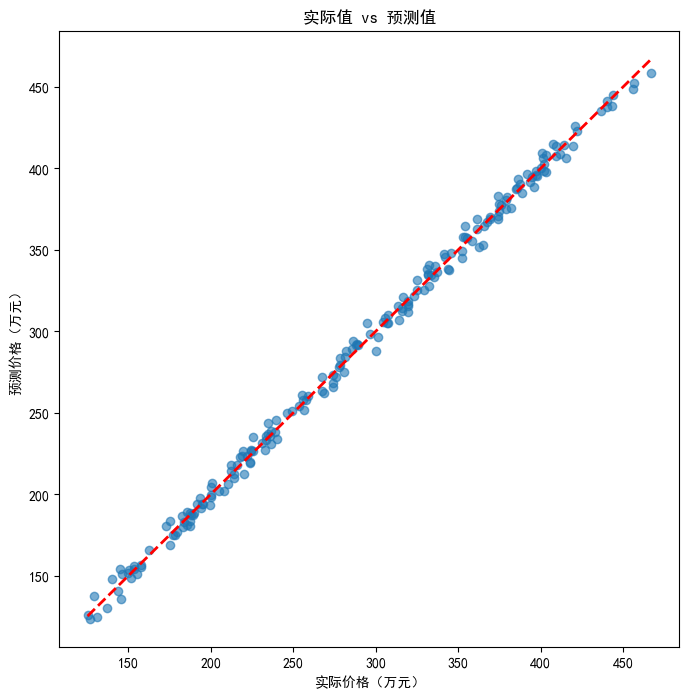

In [15]:
# 单元格6：模型评估
# 在整个数据集上进行预测
y_pred = model.predict(X)

# 计算评估指标
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("=== 模型评估 ===")
print(f"均方误差 (MSE): {mse:.2f}")
print(f"均方根误差 (RMSE): {rmse:.2f} 万元")
print(f"决定系数 (R²): {r2:.4f}")
print("R²越接近1，说明模型拟合越好")

# 绘制实际值 vs 预测值
plt.figure(figsize=(8, 8))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('实际价格（万元）')
plt.ylabel('预测价格（万元）')
plt.title('实际值 vs 预测值')
plt.show()


In [8]:
# 单元格7：查看具体预测误差
# 创建包含预测结果的数据框
results_df = df.copy()
results_df['预测价格_万元'] = y_pred
results_df['预测误差_万元'] = results_df['预测价格_万元'] - results_df['价格_万元']
results_df['误差百分比'] = (results_df['预测误差_万元'] / results_df['价格_万元']) * 100

print("预测结果详情（前10条）：")
print(results_df[['面积_平方米', '卧室数', '卫生间数', '房龄_年', '价格_万元', '预测价格_万元', '预测误差_万元']].head(10))

# 统计误差
mean_error = results_df['预测误差_万元'].mean()
mean_abs_error = results_df['预测误差_万元'].abs().mean()
print(f"\n平均误差: {mean_error:.2f}万元")
print(f"平均绝对误差: {mean_abs_error:.2f}万元")


预测结果详情（前10条）：
   面积_平方米  卧室数  卫生间数  房龄_年       价格_万元     预测价格_万元    预测误差_万元
0     152    4     3    11  384.378176  383.454442  -0.923734
1     142    1     3    24  306.393615  305.170315  -1.223300
2      64    1     3    19  141.738677  154.508126  12.769449
3     156    2     2    26  331.493531  335.250977   3.757446
4     121    3     2    20  286.456857  286.461193   0.004336
5      70    3     3     3  211.722575  213.166234   1.443659
6     152    2     3    20  345.296947  344.242158  -1.054788
7     171    2     2    22  371.511741  369.503010  -2.008732
8     124    3     3    15  315.581167  308.386835  -7.194331
9     137    3     1    24  306.562292  303.594969  -2.967323

平均误差: 0.00万元
平均绝对误差: 3.95万元


In [13]:
# 单元格8：尝试不同的特征组合（实验）
print("=== 特征组合实验 ===")

# 只使用面积一个特征
X_area = df[['面积_平方米']]
model_area = LinearRegression()
model_area.fit(X_area, y)
r2_area = r2_score(y, model_area.predict(X_area))

# 使用面积和房龄
X_area_age = df[['面积_平方米', '房龄_年']]
model_area_age = LinearRegression()
model_area_age.fit(X_area_age, y)
r2_area_age = r2_score(y, model_area_age.predict(X_area_age))

print(f"只用面积特征 - R²: {r2_area:.4f}")
print(f"用面积+房龄 - R²: {r2_area_age:.4f}")
print(f"用所有特征 - R²: {r2:.4f}")
print("R²越高，说明模型解释能力越强")

=== 特征组合实验 ===
只用面积特征 - R²: 0.9309
用面积+房龄 - R²: 0.9457
用所有特征 - R²: 0.9966
R²越高，说明模型解释能力越强
